###Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt

###Loading Data

In [2]:
loan_df = pd.read_csv('/content/drive/MyDrive/Case Studies/JP Morgan&Chase/Task 3/Loan_Data.csv')
loan_df

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0
...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0


###Exploring Loan dataset

In [3]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


No null values

In [ ]:
loan_df.describe()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.974577e+06,1.461200,4159.677034,8718.916797,70039.901401,4.552800,637.557700,0.185100
std,2.293890e+06,1.743846,1421.399078,6627.164762,20072.214143,1.566862,60.657906,0.388398
min,1.000324e+06,0.000000,46.783973,31.652732,1000.000000,0.000000,408.000000,0.000000
25%,2.977661e+06,0.000000,3154.235371,4199.836020,56539.867903,3.000000,597.000000,0.000000
50%,4.989502e+06,1.000000,4052.377228,6732.407217,70085.826330,5.000000,638.000000,0.000000
75%,6.967210e+06,2.000000,5052.898103,11272.263740,83429.166133,6.000000,679.000000,0.000000
max,8.999789e+06,5.000000,10750.677810,43688.784100,148412.180500,10.000000,850.000000,1.000000


In [4]:
loan_df['default'].value_counts()

,count
default,
0,8149
1,1851


Default → 8.1K (approx. )

Non-Default → 1.9K (approx. )

###EDA

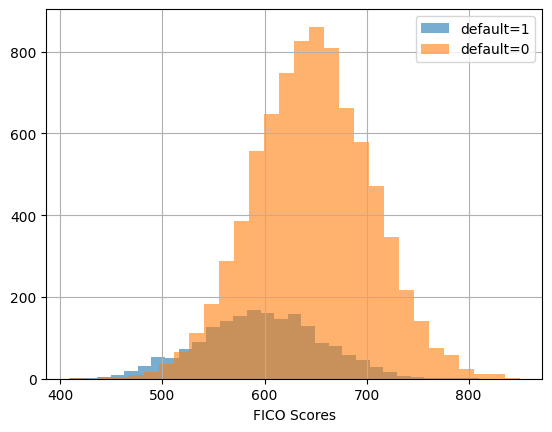

In [ ]:
#Dual histogram of FICO scores depending on the default
loan_df[loan_df['default'] == 1]['fico_score'].hist(bins=30,alpha=0.6,label='default=1')
loan_df[loan_df['default']==0]['fico_score'].hist(bins=30,alpha=0.6,label='default=0')
plt.xlabel('FICO Scores')
plt.legend()
plt.show()

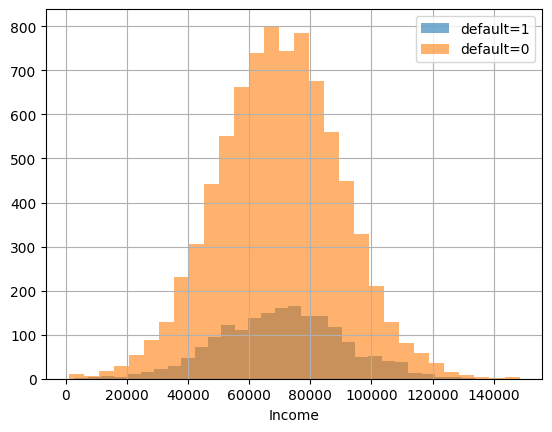

In [ ]:
#Dual histogram of income depending on the default
loan_df[loan_df['default'] == 1]['income'].hist(bins=30,alpha=0.6,label='default=1')
loan_df[loan_df['default']==0]['income'].hist(bins=30,alpha=0.6,label='default=0')
plt.xlabel('Income')
plt.legend()
plt.show()

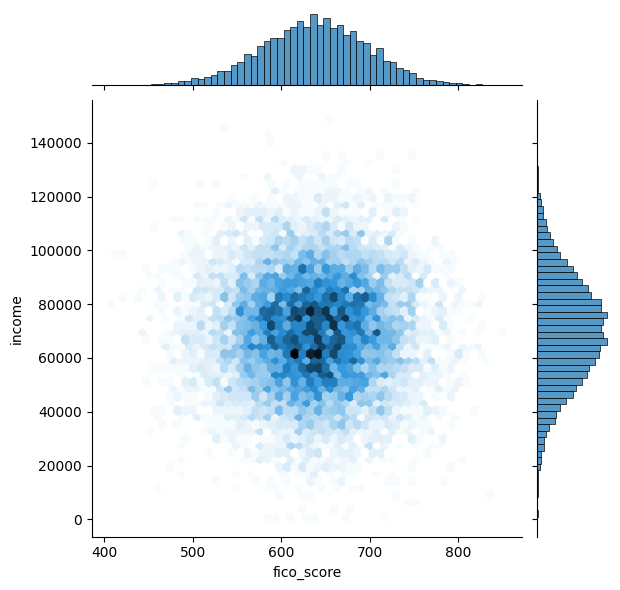

In [ ]:
#Creating jointplot of Fico scores and income
sns.jointplot(x='fico_score',y='income',data=loan_df,kind='hex')

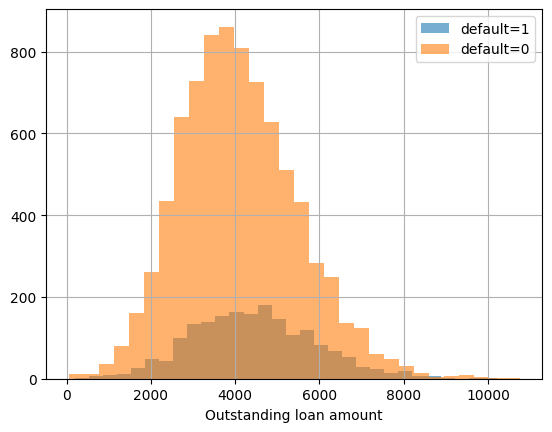

In [ ]:
#Dual histogram of outstanding loan amount depending on the default
loan_df[loan_df['default'] == 1]['loan_amt_outstanding'].hist(bins=30,alpha=0.6,label='default=1')
loan_df[loan_df['default']==0]['loan_amt_outstanding'].hist(bins=30,alpha=0.6,label='default=0')
plt.xlabel('Outstanding loan amount')
plt.legend()
plt.show()

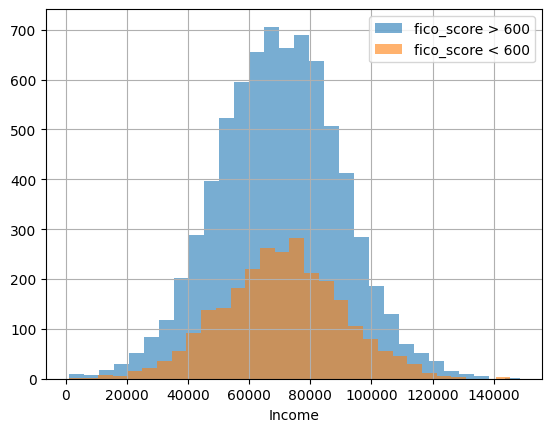

In [ ]:
#Dual histogram of income depending on whether their fico score is above 600 or not
loan_df[loan_df['fico_score'] >= 600]['income'].hist(bins=30,alpha=0.6,label='fico_score > 600')
loan_df[loan_df['fico_score'] < 600]['income'].hist(bins=30,alpha=0.6,label='fico_score < 600')
plt.xlabel('Income')
plt.legend()
plt.show()

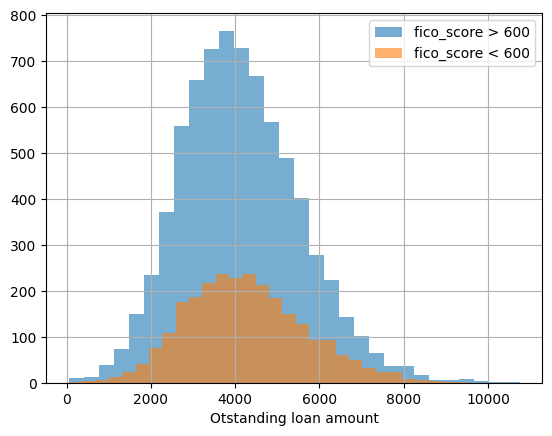

In [ ]:
#Dual histogram of outstanding loan amount depending on whether their fico score is above 600 or not
loan_df[loan_df['fico_score'] >= 600]['loan_amt_outstanding'].hist(bins=30,alpha=0.6,label='fico_score > 600')
loan_df[loan_df['fico_score'] < 600]['loan_amt_outstanding'].hist(bins=30,alpha=0.6,label='fico_score < 600')
plt.xlabel('Outstanding loan amount')
plt.legend()
plt.show()

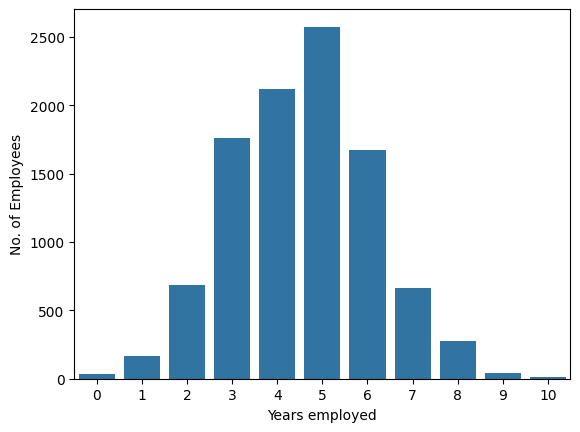

In [ ]:
#Plot no. of customers by variation in their years of employment using barchart
df = loan_df.groupby(['years_employed'])['years_employed'].count().reset_index(name='count').sort_values('years_employed',ascending=True)
sns.barplot(x='years_employed',y='count',data=df)
plt.xlabel('Years employed')
plt.ylabel('No. of Customers')
plt.show()

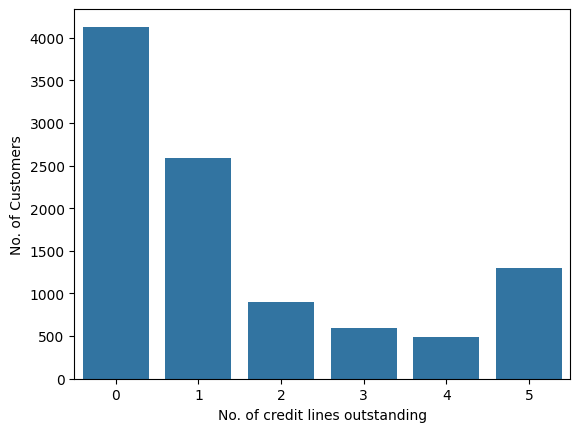

In [ ]:
#Plot no. of customers based on their variation in outstanding credit lines using barchart
df = loan_df.groupby(['credit_lines_outstanding'])['credit_lines_outstanding'].count().reset_index(name='count').sort_values('credit_lines_outstanding',ascending=True)
sns.barplot(x='credit_lines_outstanding',y='count',data=df)
plt.xlabel('No. of credit lines outstanding')
plt.ylabel('No. of Customers')
plt.show()

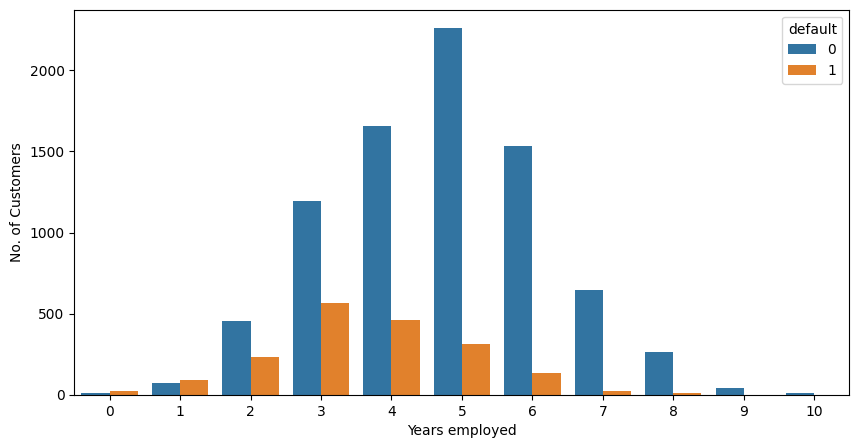

In [20]:
#Count no.of customers in each default category based on their years of employment
plt.figure(figsize=(10,5))
sns.countplot(x='years_employed',hue='default',data=loan_df)
plt.xlabel('Years employed')
plt.ylabel('No. of Customers')
plt.show()

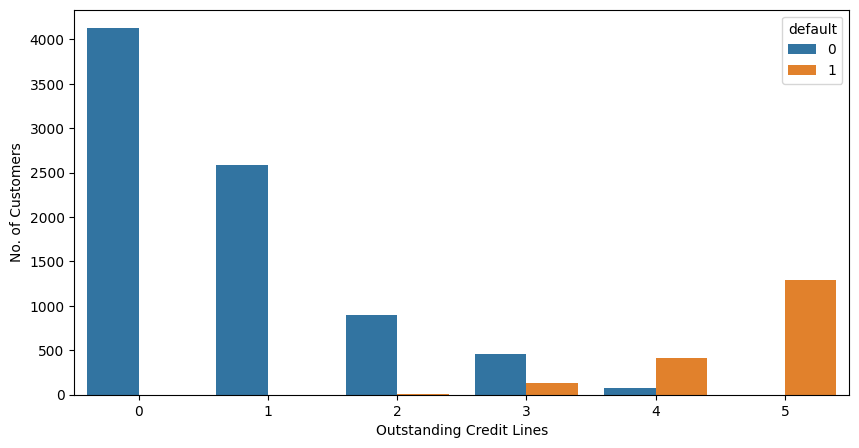

In [21]:
#Count no.of customers in each default category based on their outstanding credit lines
plt.figure(figsize=(10,5))
sns.countplot(x='credit_lines_outstanding',hue='default',data=loan_df)
plt.xlabel('Outstanding Credit Lines')
plt.ylabel('No. of Customers')
plt.show()

In [5]:
#Creating debt_to_income ratio
loan_df['income_to_debt'] = loan_df['income']/loan_df['total_debt_outstanding']

In [6]:
#Creating payment_to_income ratio
loan_df['income_to_payment'] = loan_df['income']/loan_df['loan_amt_outstanding']

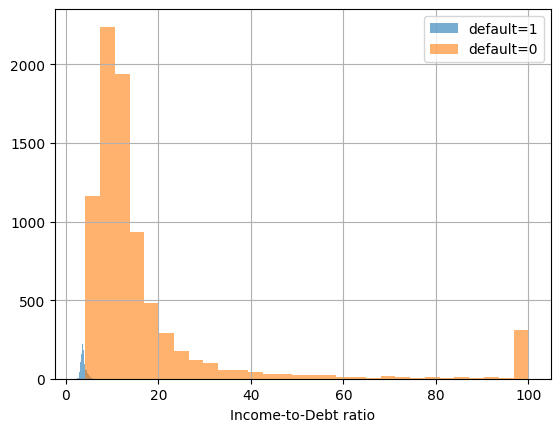

In [30]:
#Dual histogram of income-to-debt ratio depending on the default
loan_df[loan_df['default'] == 1]['income_to_debt'].hist(bins=30,alpha=0.6,label='default=1')
loan_df[loan_df['default']==0]['income_to_debt'].hist(bins=30,alpha=0.6,label='default=0')
plt.xlabel('Income-to-Debt ratio')
plt.legend()
plt.show()

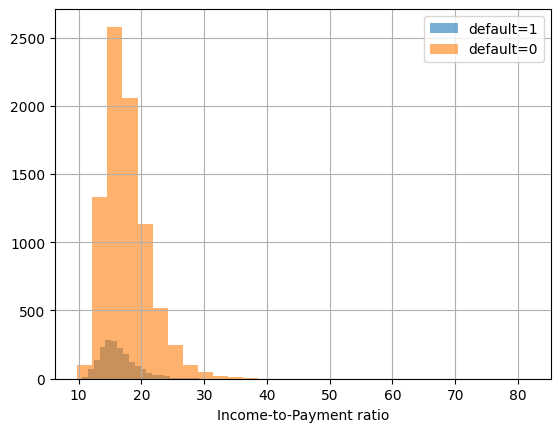

In [29]:
#Dual histogram of income-to-payment depending on the default
loan_df[loan_df['default'] == 1]['income_to_payment'].hist(bins=30,alpha=0.6,label='default=1')
loan_df[loan_df['default']==0]['income_to_payment'].hist(bins=30,alpha=0.6,label='default=0')
plt.xlabel('Income-to-Payment ratio')
plt.legend()
plt.show()

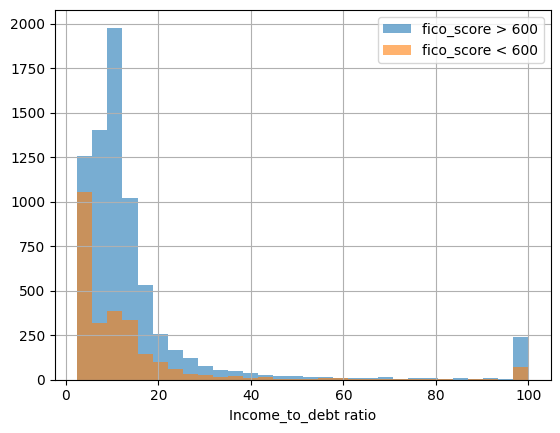

In [31]:
#Dual histogram of income-to-debt ratio depending on whether their fico score is above 600 or not
loan_df[loan_df['fico_score'] >= 600]['income_to_debt'].hist(bins=30,alpha=0.6,label='fico_score > 600')
loan_df[loan_df['fico_score'] < 600]['income_to_debt'].hist(bins=30,alpha=0.6,label='fico_score < 600')
plt.xlabel('Income_to_debt ratio')
plt.legend()
plt.show()

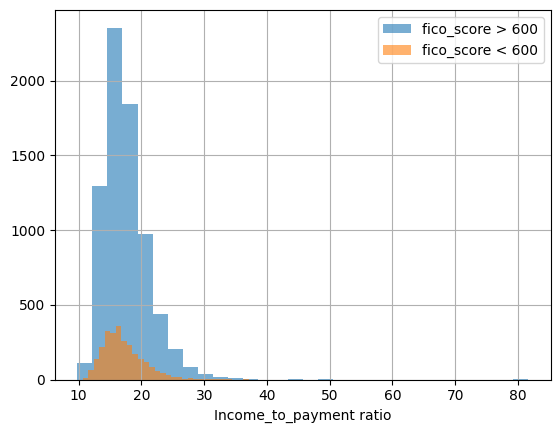

In [32]:
#Dual histogram of income-to-payment ratio depending on whether their fico score is above 600 or not
loan_df[loan_df['fico_score'] >= 600]['income_to_payment'].hist(bins=30,alpha=0.6,label='fico_score > 600')
loan_df[loan_df['fico_score'] < 600]['income_to_payment'].hist(bins=30,alpha=0.6,label='fico_score < 600')
plt.xlabel('Income_to_payment ratio')
plt.legend()
plt.show()

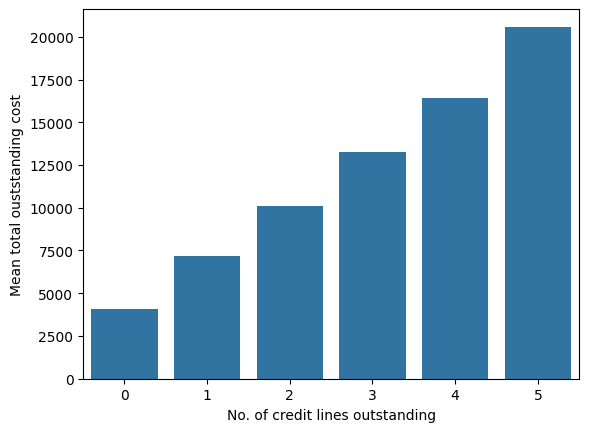

In [33]:
#Plot credit lines outstanding to mean total outstanding debt using barchart
df = loan_df.groupby(['credit_lines_outstanding'])['total_debt_outstanding'].mean().reset_index(name='mean_debt').sort_values('credit_lines_outstanding',ascending=True)
sns.barplot(x='credit_lines_outstanding',y='mean_debt',data=df)
plt.xlabel('No. of credit lines outstanding')
plt.ylabel('Mean total ouststanding cost')
plt.show()

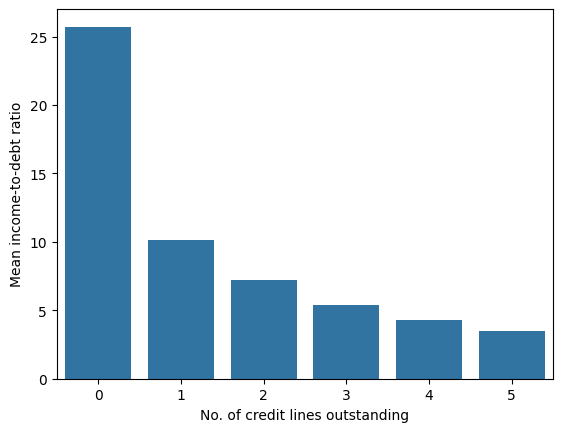

In [34]:
#Plot credit lines outstanding to mean total income-to-debt ratio using barchart
df = loan_df.groupby(['credit_lines_outstanding'])['income_to_debt'].mean().reset_index(name='mean').sort_values('credit_lines_outstanding',ascending=True)
sns.barplot(x='credit_lines_outstanding',y='mean',data=df)
plt.xlabel('No. of credit lines outstanding')
plt.ylabel('Mean income-to-debt ratio')
plt.show()

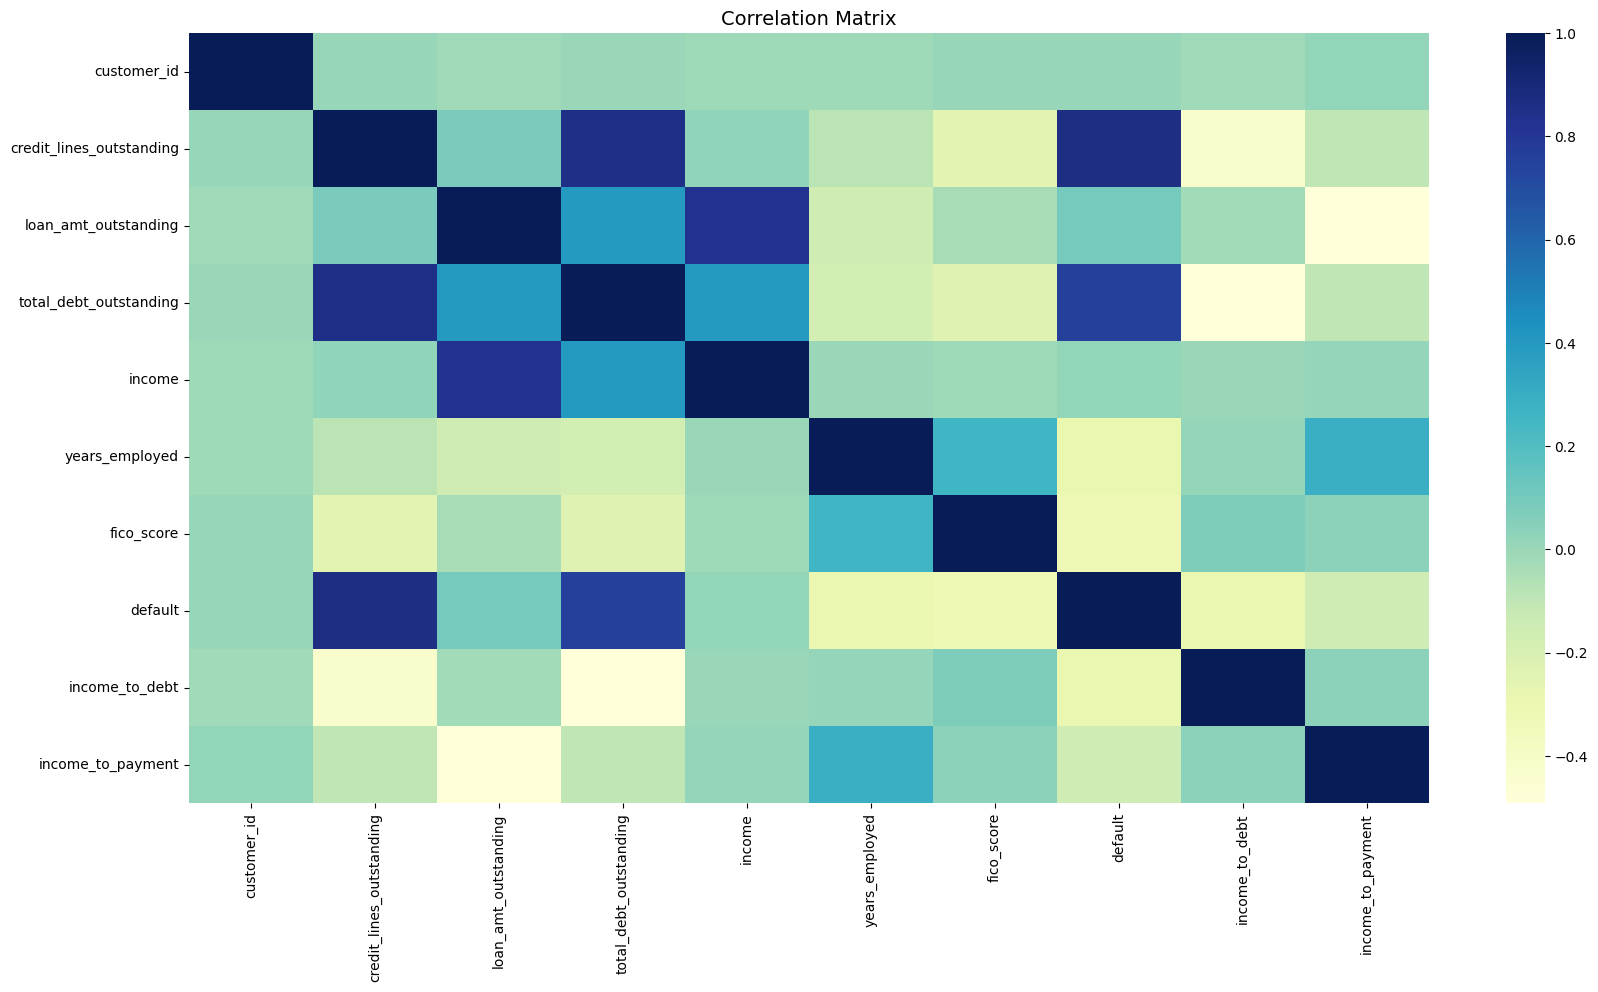

In [37]:
#Correlation in credit features
fig,ax = plt.subplots(figsize=(20,10))

corr = loan_df.corr()
sns.heatmap(corr, cmap='YlGnBu',annot_kws={'size':20},ax=ax)
ax.set_title('Correlation Matrix',fontsize=14)
plt.show()